# HW-1
## Question-1

In [1]:
import numpy as np
# For this, we can use tensordot function from numpy: Reference to : 
# https://github.com/numpy/numpy/blob/v1.23.0/numpy/core/numeric.py#L949-L1139:~:text=%40array_function_dispatch(_tensordot_dispatcher,axes%3D2)%3A
def tensor_vector_inner_product(A,x,p=2):
    if x.ndim != 1:
        print("Second input should be vector!")
        return
    if A.ndim < x.ndim:
        print("First input's dimension should have greater than or equal to second input's dimension!")
    c = np.tensordot(A,x, axes=p)
    return c
    
    

In [2]:
# For logical explanation, see https://stackoverflow.com/questions/41870228/understanding-tensordot#:~:text=Two%20axes%20of%20sum%2Dreduction
A = np.random.randint(2, size=(2, 3, 5))
B = np.random.randint(2, size=(5))
C = tensor_vector_inner_product(A,B, p=0)
C.shape

(2, 3, 5, 5)

## Question-2

In [3]:
def calculate_eps():
    epsilon=1.0
    while epsilon+1>1:
        epsilon=epsilon/2
    epsilon=epsilon*2
    print("The value of epsilon is:",epsilon)
    return epsilon

In [4]:
eps = calculate_eps()

The value of epsilon is: 2.220446049250313e-16


## Question-3

In [5]:
import numpy as np
import sys
EXP_BIAS = 1023
def binary_to_dec(binary_list):
    dec = int("".join(str(x) for x in binary_list), 2)
    return dec   
    
    
def ieee754_db(np_array_represent_double_prec):
    # Array values should be 0 or 1, check this.
    if np_array_represent_double_prec.shape[1] != 64:
        print("The input length should be 64!")
        return
    if not np.array_equal(np_array_represent_double_prec, np_array_represent_double_prec.astype(bool)):
        print("Input must consist of 0 or 1!")
        return
    
    # Make it list
    temp = list(np_array_represent_double_prec[0])
    binary_input = [int(x) for x in temp]
#     print(binary_input)
    
    # Sign bit
    sign_bit = binary_input[0]
    if binary_input[0] == 0:
        flag = True
    else:
        flag = False
        
    # Exponent bits
    exp_bits = binary_input[1:12]
    dec = binary_to_dec(exp_bits)
    e = dec - EXP_BIAS
    print("e is ", e)
        
    
    # Fraction bits
    frac_bits = binary_input[12:]
    mantis = 0
    for idx, fbit in enumerate(frac_bits):
        up = idx+1
        mantis += fbit*(2**-up)
    print("mantissa part is ",mantis)
    
    # Check whether it is normal, subnormal or exceptions:
    if (dec == 0) and (mantis == 0):
        if flag:
            print("Result is +0")
        else:
            print("Result is -0")
    elif (dec == 2047) and (mantis == 0):
        if flag:
            print("Result is +Inf")
        else:
            print("Result is -Inf")
    elif (dec == 2047) and (mantis != 0):
        print("Result is NaN")
    else:
        res = ((-1)**sign_bit) * (1+ mantis) * (2 ** e)
        print("In decimal, it is ", res)

    
     
    

In [6]:
#  
true_input = np.around(np.random.rand(1,64))
decimal_value = ieee754_db(true_input)

e is  263
mantissa part is  0.24267848994812247
In decimal, it is  1.841821934097489e+79


In [7]:
# Check with false input
from random import randrange
rand_index = randrange(64)
false_input = true_input.copy()
false_input[0][rand_index] = 7
ieee754_db(false_input)

Input must consist of 0 or 1!


In [8]:
# Check with known 64bit value, result should be 85
check_dec = np.array([0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]).reshape(1,64)
ieee754_db(check_dec)

e is  6
mantissa part is  0.328125
In decimal, it is  85.0


In [9]:
# Check one of the exceptions
exception_input = np.array([1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]).reshape(1,64)
dec = ieee754_db(exception_input)

e is  1024
mantissa part is  0.0
Result is -Inf


In [10]:
# Check one of the exceptions
exception_input = np.array([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]).reshape(1,64)
dec = ieee754_db(exception_input)

e is  -1023
mantissa part is  0.0
Result is -0


## Question-4

<ipython-input-11-0edd4f4d338b>:5: RuntimeWarning: divide by zero encountered in log
  y = np.log(np.sin(x))
<ipython-input-11-0edd4f4d338b>:5: RuntimeWarning: invalid value encountered in log
  y = np.log(np.sin(x))


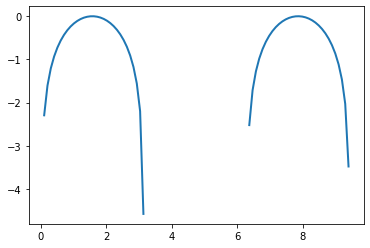

In [11]:
# plot f(x) = ln(sin(x))
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
y = np.log(np.sin(x))
# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

plt.show()

The Q4.pdf has detailed answer for this question. My answer is consistent with the above plot. 